In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [1]:
# z_score for sampling distributions

def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

# Understanding the Hypothesis Testing

Step - 1:
Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ &gt;, \ &lt;, \ \neq  $
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

Step - 2:

Collect a sample of size n
Compute the mean from this sample $ \bar{x} $
Step - 3: Compute Test Statistic:

If population variance is known$$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

If population variance is unknown$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4: Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

Step - 5.1: Apply decision rule:

If test statistic is z-score -

Two tailed z-test:$$ |z| &gt; z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
Right tailed z-test:$$ z &gt; z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Left tailed z-test:$$ z &lt; -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
If test statistic is t-score

Two tailed t-test:$$ |t| &gt; t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Right tailed t-test:$$ t &gt; t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Left tailed t-test:$$ t &lt; t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $

For two tailed test:$$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$Now,$$ if (p \ value &lt; \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$


Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? (Given that the population std is 50)

Known Variance of Population
Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? (Given that the population std is 50)

Step - 1:
Alternate Hypothesis (Bold claim):$$ H_1: \ ? $$Null Hypothesis (Status Quo):$$ H_0: \ ? $$

Step - 2:

Collect a sample of size n = 10$$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
Compute sample mean$$ \bar{x} \ = \ ? $$
Step - 3: Compute Test Statistic:$$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $ or significance level

Step - 5.1: ? tailed z-test:$$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [6]:
#CASE 1 STD = 50
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

sum(l)/len(l)


465.3

In [7]:
#step2
sample_size = 10
sample_mean = 465.3
pop_mean = 500
pop_std = 50

In [8]:
#step 3
z = z_score(sample_size, sample_mean, pop_mean, pop_std)

print(z)

-2.1946206961568544


In [12]:
#step 4 
#Two Tail - Calculating the z-critical value

from scipy.stats import norm
confidence_level = 0.95

alpha = 1 - confidence_level

z_critical = norm.ppf(1 - alpha/2) # Two tailed Z score for 95% Confidence Level

print(z_critical)

1.959963984540054


In [15]:
# Conclusion using z test

if(np.abs(z) > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


Text(465.3, 0.0007, 'x_bar')

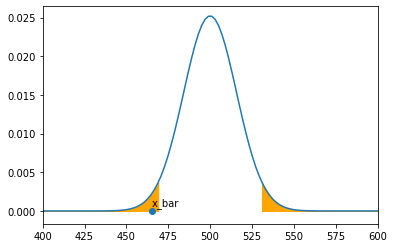

In [18]:
#Plotting
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)




# Computing the left and right critical values (Two tailed Test)
z_critical_left = pop_mean + (-z_critical * std)
z_critical_right = pop_mean + (z_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(z_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis


In [19]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(z)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")



p_value =  0.028190817687629988
Reject Null Hypothesis


In [ ]:
#case2 std is not given


In [20]:
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

sum(l)/len(l)

465.3

In [33]:
import statistics

sample_std = statistics.stdev(l)
sample_std


86.84859110991829

In [34]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 465.3
pop_mean = 500


In [35]:
#step4
#we perform 2 tail test as H1 != 500gm
confidence_level=0.95
alpha=1-confidence_level
alpha

0.050000000000000044

In [36]:
#df=degree of freedom=n-1   here n(sample size) is 10
from scipy.stats import t
t_critical=t.ppf(1-alpha/2,df=9)
t_critical

2.2621571627409915

In [39]:
def t_score(sample_mean,pop_mean,sample_std,sample_size):
    numerator=sample_mean-pop_mean
    denominator=sample_std/ (sample_size**0.5)
    return numerator/denominator

In [40]:
t = t_score(sample_mean,pop_mean,sample_std,sample_size)
t

-1.263475128444671

In [41]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [42]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20641847943818137
Fail to reject Null Hypothesis


Text(465.3, 0.0007, 'x_bar')

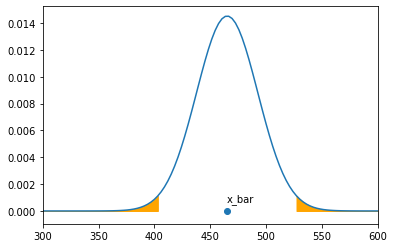

In [45]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 300
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = sample_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = sample_mean + (-t_critical * std)
t_critical_right = sample_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? (Given that the population std is 0.5)


In [ ]:
#Case1   pop std is given
 #H0 <= 4
# H1 > 4

In [46]:
l = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]

sum(l)/len(l)

4.25

In [47]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 4.25
pop_mean = 4
pop_std = 0.5

In [48]:
# Calculating the z-score

z = z_score(sample_size, sample_mean, pop_mean, pop_std)

print(z)

2.23606797749979


In [49]:
# One Tail - Calculating the z-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

z_critical = norm.ppf(1 - alpha)

print(z_critical)

1.6448536269514722


In [50]:
# Conclusion using z test

if(z > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [51]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(z))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0126736593387341
Reject Null Hypothesis


Text(4.25, 0.1, 'x_bar')

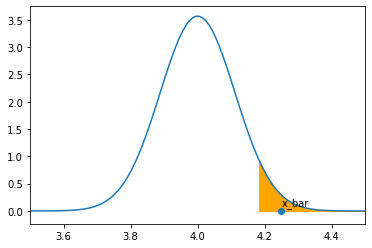

In [52]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
z_critical_right = pop_mean + (z_critical * std)


# Shading the right rejection region
x1 = np.linspace(z_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [ ]:
#case2 pop_std not given

In [53]:
# H0 <= 4
# H1 > 4

In [54]:
l=[4,5,4,4,4,4,3.5,4.5,5,4,4,4.5,4,4,4.5,4,4,5,5,4]
sample_mean=sum(l)/len(l)
sample_mean

4.25

In [55]:
new=[]
for i in l:
    new.append((i-sample_mean)**2)

numerator=0
for i in range(0,len(new)):
    numerator=numerator+new[i]

denominator=len(new)-1

sample_sd=(numerator/denominator)**0.5
sample_sd

0.4442616583193193

In [56]:
from scipy.stats import t

In [57]:
confidence_level=0.95
alpha=1-confidence_level
alpha

0.050000000000000044

In [58]:
t_critical=t.ppf(1-alpha,df=19)
print(t_critical)


1.729132811521367


In [59]:
sample_size = 20
sample_mean = 4.25
pop_mean = 4
sample_sd = 0.4442616583193193

In [60]:
t=t_score(sample_mean,pop_mean,sample_sd,sample_size)
t

2.516611478423583

In [61]:
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? (Given that the population std is 1)


In [ ]:
#case 1 pop std is given

In [62]:
l = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]

sum(l)/len(l)

15.098999999999998

In [63]:
sample_size = 20
sample_mean = 15.1
pop_mean = 15
pop_std = 1

In [64]:
z = z_score(sample_size, sample_mean, pop_mean, pop_std)

print(z)

0.4472135954999564


In [65]:
# One Tail

confidence_level = 0.95

alpha = 1 - confidence_level

z_critical = norm.ppf(1 - alpha)

print(z_critical)

1.6448536269514722


In [66]:
if(z > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [67]:
p_value = 1.0 - norm.cdf(np.abs(z))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.32736042300928914
Fail to reject Null Hypothesis


Text(15.1, 0.1, 'x_bar')

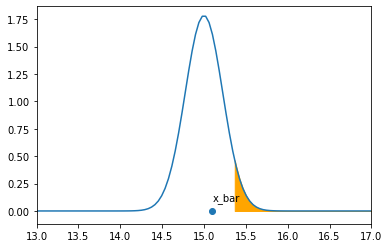

In [68]:
x_min = 13
x_max = 17

mean = pop_mean
std = pop_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

z_critical_right = pop_mean + (z_critical * std)

x1 = np.linspace(z_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the acceptance region
# i.e. Fail to Reject the Null Hypothesis

In [ ]:
#case 2 

In [69]:
# H0 <= 15
# H1 > 15

In [70]:
l=[14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
sample_mean=sum(l)/len(l)
sample_mean

15.098999999999998

In [71]:
new=[]
for i in l:
    new.append((i-sample_mean)**2)

numerator=0
for i in range(0,len(new)):
    numerator=numerator+new[i]

denominator=len(new)-1

sample_sd=(numerator/denominator)**0.5
sample_sd

1.0253671999517255

In [72]:
from scipy.stats import t

In [73]:
confidence_level=0.95
alpha=1-confidence_level
alpha

0.050000000000000044

In [74]:
t_critical=t.ppf(1-alpha,df=19)
print(t_critical)

1.729132811521367


In [75]:
sample_size = 20
sample_mean = 15.098999999999998
pop_mean = 15
sample_sd = 1.0253671999517255

In [76]:
t=t_score(sample_mean,pop_mean,sample_sd,sample_size)
t

0.4317882018907916

In [77]:
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? (Based on past data you know that the std is 10 ms)

Step - 1:
Alternate Hypothesis (Bold Claim):$$ H_1: \ ? $$Null Hypothesis (Status Quo):$$ H_0: \ ? $$

Step - 2:

Collect a sample of size n = 100
Compute sample mean$$ \bar{x} \ = \ 97.5 $$
Step - 3: Compute Test Statistic:$$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $

Step - 5.1: ? tailed z-test:$$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [78]:
#Case1 pop std is given

In [79]:
sample_size = 100
sample_mean = 97.5
pop_mean = 100
pop_std = 10

In [80]:
z = z_score(sample_size, sample_mean, pop_mean, pop_std)

print(z)

-2.5


In [81]:
# One Tail

confidence_level = 0.99

alpha = 1 - confidence_level

z_critical = norm.ppf(1 - alpha)

print(z_critical)

2.3263478740408408


In [82]:
if(z < -z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [84]:
p_value = 1.0 - norm.cdf(np.abs(z))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.006209665325776159
Reject Null Hypothesis


Text(97.5, 0.02, 'x_bar')

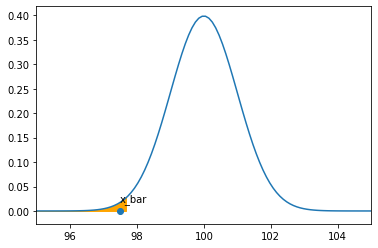

In [85]:
x_min = 95
x_max = 105

mean = pop_mean
std = pop_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

z_critical_left = pop_mean + (-z_critical * std)

x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis

In [86]:
#case2 pop std is not given

In [87]:
# H0 >= 100
# H1 < 100

In [88]:
l=[98,100,94,98,100,95]
sample_mean=sum(l)/len(l)
sample_mean

97.5

In [89]:
new=[]
for i in l:
    new.append((i-sample_mean)**2)

numerator=0
for i in range(0,len(new)):
    numerator=numerator+new[i]

denominator=len(new)-1

sample_sd=(numerator/denominator)**0.5
sample_sd

2.5099800796022267

In [90]:
from scipy.stats import t

In [91]:
confidence_level=0.95
alpha=1-confidence_level
alpha

0.050000000000000044

In [92]:
#As it is left one tail test
t_critical=t.ppf(1-alpha,df=5)
t_critical=-t_critical
print(t_critical)

-2.015048372669157


In [93]:
sample_size = 6
sample_mean = 97.5
pop_mean = 100
sample_sd = 2.5099800796022267

In [94]:
t=t_score(sample_mean,pop_mean,sample_sd,sample_size)
t

-2.439750182371333

In [95]:
if(t < t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis
